## Product Recommendation System

### Main Problem: Recommend products to customers based on their past purchases and product categories they tend to buy.

### Data Understanding
#### 1.0. What is the domain area of the dataset?
The Black Friday Sales dataset is a comprehensive collection of sales transaction data from a major retail store during a Black Friday event.

#### 1.1. Under which circumstances was it collected?
It is obtained from a major retail store during a Black Friday event.

#### 2.0. Which data format?
The format of the dataset is *.csv*

#### 2.1. Do the files have headers or another file describing the data?
The files does have headers that describes the data! Each column has a name that describes the data it contains!

#### 2.2. Are the data values separated by commas, semicolon, or tabs?
The data values are separated by commas!  
**Example:**   
User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase  
1000001,P00069042,F,0-17,10,A,2,0,3,,,8370  

#### 3.0 How many features and how many observations does the dataset have?
The dataset has:  
* over 550,000 observations or rows!  
* 12 features or columns!

#### 4.0 Does it contain numerical features? How many?
Yes it has 4 numerical features.

#### 5.0. Does it contain categorical features? How many?
Yes, it has 5 numerical features.

### Features

User ID: Unique ID for each customer.  
Product ID: Unique ID for each product.  
Gender: Gender of the customer, either male or female.  
Age: The age group of the customer, represented in categories (e.g., 18-25, 26-35, etc.).  
Occupation: Occupation category code of the customer.  
City_Category: The category of the city where the customer resides, classified as A, B, or C.  
Stay_In_Current_City_Years: Number of years the customer has lived in the current city.  
Marital_Status: Indicates whether the customer is married (1) or not (0).  
Product_Category 1, 2, 3: Product categories associated with the purchased item.  
Purchase: The amount spent by the customer on the product.  

##  Data Preprocessing

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("datasets/BlackFriday.csv")

In [3]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
print(f"Number of features in the dataset is {dataset.shape[1]} and the number of observations/rows in the dataset is {dataset.shape[0]}")

Number of features in the dataset is 12 and the number of observations/rows in the dataset is 537577


### Checking Missing Values

In [6]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
# NaN values in Product_Category_1 and Product_Category_2 mean that a customer hasn't bought anything from those categories.

#dataset['Product_Category_2'].fillna(0, inplace=True)
#dataset['Product_Category_3'].fillna(0, inplace=True)

### Encoding Categorical Variable

In [8]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for Gender
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [9]:
dataset.shape

(537577, 12)

## Exploratory Data Analysis

1.  **Which product categories are most frequently purchased?**   
Understanding which products are popular will help you recommend items that are commonly bought by customers.  
Popular products can be good recommendations for new or similar customers.  
The idea is to analyze the subcategories within each product category to find which ones are most frequently purchased.

In [10]:
# Grouping by Product_Category_1 to analyze purchase patterns
category_1_group = dataset.groupby('Product_Category_1')['Purchase'].agg(['count']).reset_index()

# Similarly for Product_Category_2 and Product_Category_3
category_2_group = dataset.groupby('Product_Category_2')['Purchase'].agg(['count']).reset_index()
category_3_group = dataset.groupby('Product_Category_3')['Purchase'].agg(['count']).reset_index()

# View the results
# count: Total purchases in each category.
# mean: Average purchase amount per product category.
# sum: Total money spent in each category.
# There are at least 16 different subcategories in each main category.
print(category_1_group.head())
print(category_2_group.head())
print(category_3_group.head())

   Product_Category_1   count
0                   1  138353
1                   2   23499
2                   3   19849
3                   4   11567
4                   5  148592
   Product_Category_2  count
0                 2.0  48481
1                 3.0   2835
2                 4.0  25225
3                 5.0  25874
4                 6.0  16251
   Product_Category_3  count
0                 3.0    600
1                 4.0   1840
2                 5.0  16380
3                 6.0   4818
4                 8.0  12384


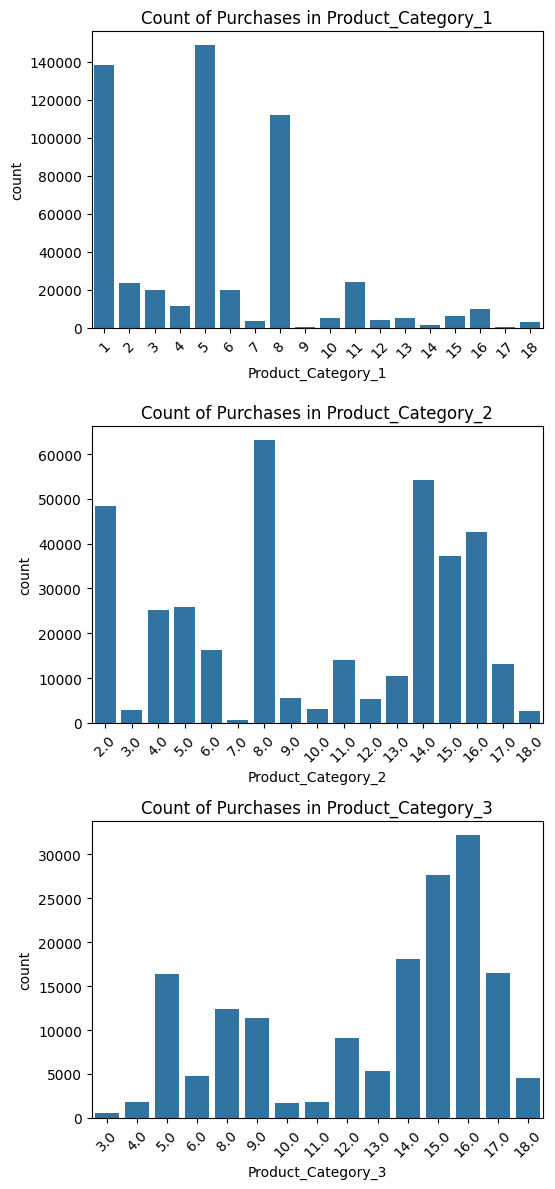

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to hold the grouped data for easy iteration
category_groups = {
    'Product_Category_1': category_1_group,
    'Product_Category_2': category_2_group,
    'Product_Category_3': category_3_group
}

# Aggregation functions to plot
aggregation_functions = ['count']

# Set up the figure size for multiple plots
plt.figure(figsize=(15, 12))

# Loop through each product category and each aggregation function
for i, (category, data) in enumerate(category_groups.items()):
    for j, agg_func in enumerate(aggregation_functions):
        plt.subplot(3, 3, i*3 + j + 1)  # Create a grid of 3x3 subplots
        sns.barplot(x=category, y=agg_func, data=data)
        plt.title(f'{agg_func.capitalize()} of Purchases in {category}')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

2. **What are the purchase patterns across different age groups and gender?**  
Different customer demographics may prefer certain products.  
Identifying trends based on **age** or **gender** helps tailor recommendations to individual customer profiles.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Gender and Product_Category_1
gender_category_group1 = dataset.groupby(['Gender', 'Product_Category_1'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()
gender_category_group2 = dataset.groupby(['Gender', 'Product_Category_2'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()
gender_category_group3 = dataset.groupby(['Gender', 'Product_Category_3'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

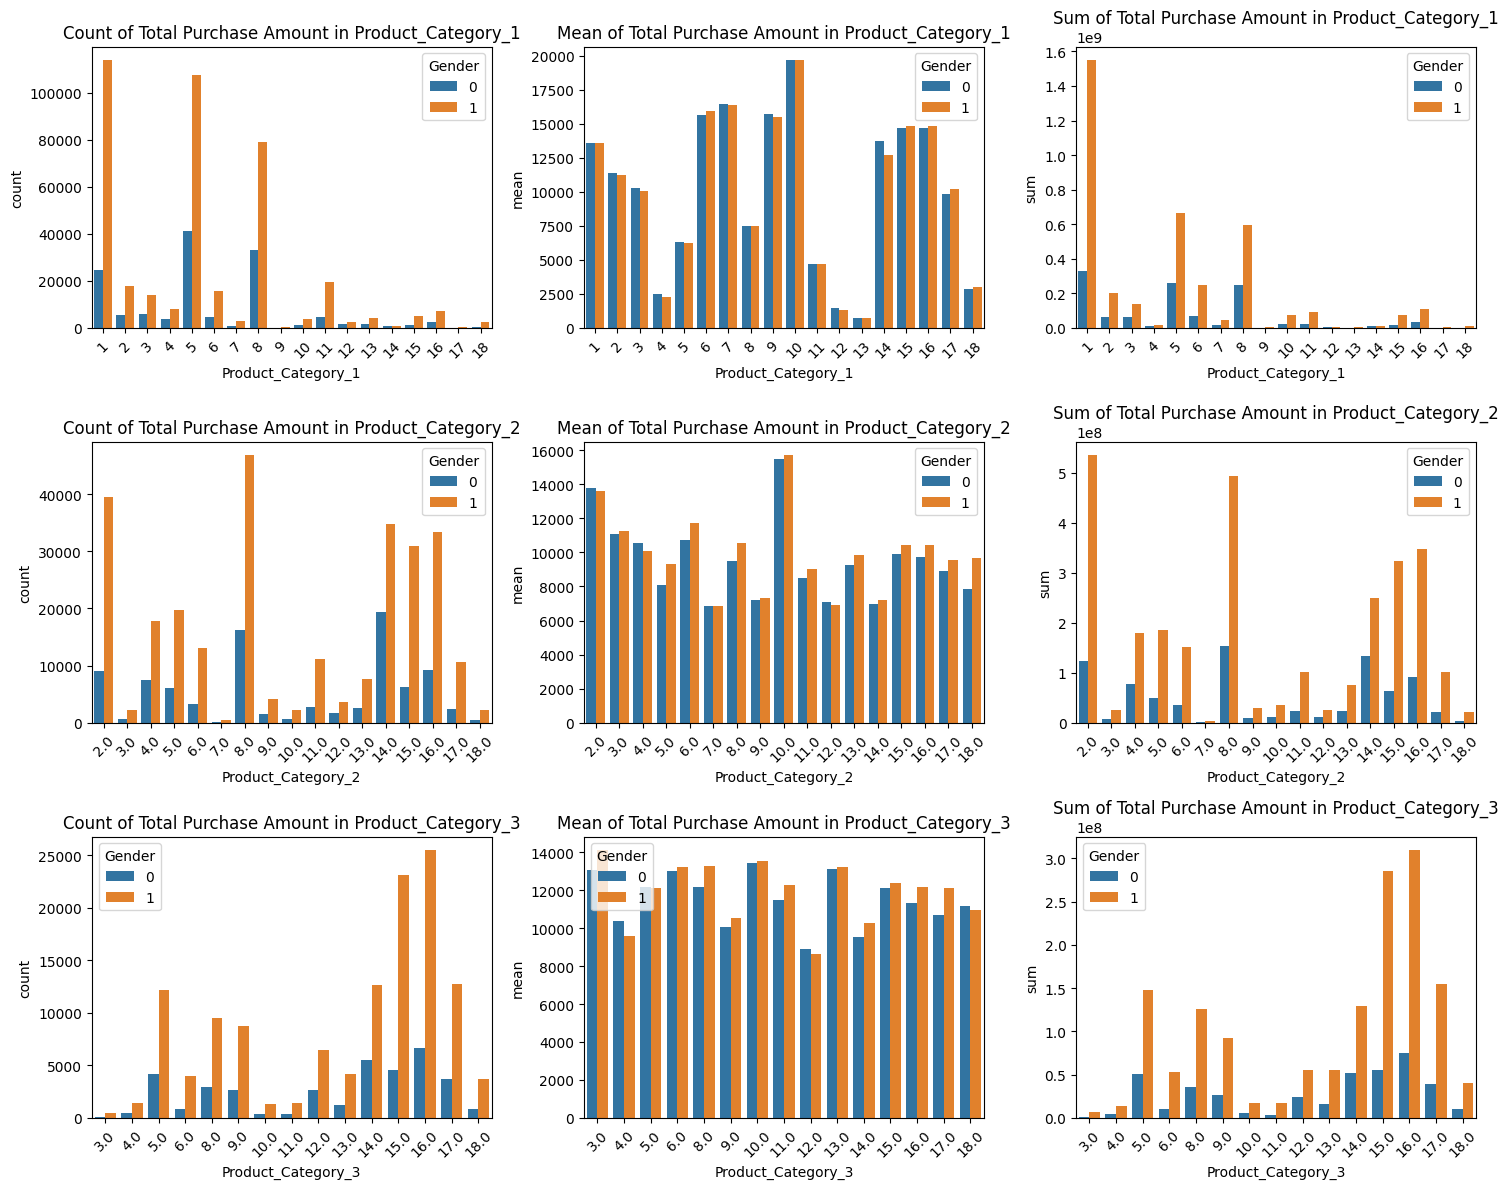

In [13]:
# Dictionary to hold the grouped data for easy iteration
gender_category_groups = {
    'Product_Category_1': gender_category_group1,
    'Product_Category_2': gender_category_group2,
    'Product_Category_3': gender_category_group3
}

# Aggregation functions to plot
aggregation_functions = ['count', 'mean', 'sum']

# Set up the figure size for multiple plots
plt.figure(figsize=(15, 12))

# Loop through each product category and each aggregation function
for i, (category, data) in enumerate(gender_category_groups.items()):
    for j, agg_func in enumerate(aggregation_functions):
        plt.subplot(3, 3, i*3 + j + 1)  # Create a grid of 3x3 subplots
        sns.barplot(x=category, y=agg_func, hue='Gender', data=data)
        plt.title(f'{agg_func.capitalize()} of Total Purchase Amount in {category}')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

   Gender   count         mean         sum
0       0  132197  8809.761349  1164624021
1       1  405380  9504.771713  3853044357


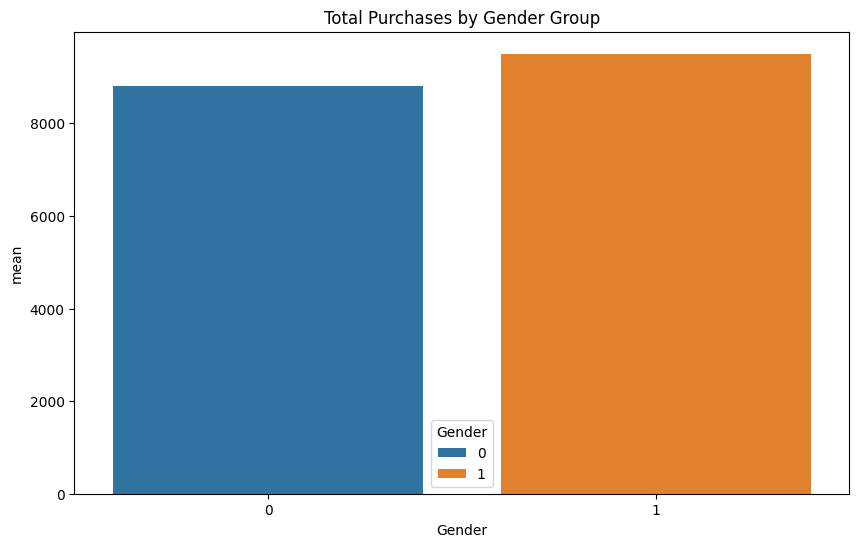

In [14]:
# --------------------------------------------------- Total purchases by FEMALE and MALE ------------------------------------------------ #

# Group by Gender and analyze product purchases
gender_purchase_group = dataset.groupby('Gender')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

print(gender_purchase_group)

# F = 0
# M = 1

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='mean', hue='Gender', data=gender_purchase_group)
plt.title('Total Purchases by Gender Group')
plt.show()

3. **How does spending vary across product categories?**  
If customers spend more on certain categories, those categories may be more valuable or interesting to recommend.  
It helps focus recommendations on higher-value products.

In [15]:
spending_category_1 = dataset.groupby(['Product_Category_1'])['Purchase'].agg(['mean', 'sum']).reset_index()
spending_category_2 = dataset.groupby(['Product_Category_2'])['Purchase'].agg(['mean', 'sum']).reset_index()
spending_category_3 = dataset.groupby(['Product_Category_3'])['Purchase'].agg(['mean', 'sum']).reset_index()


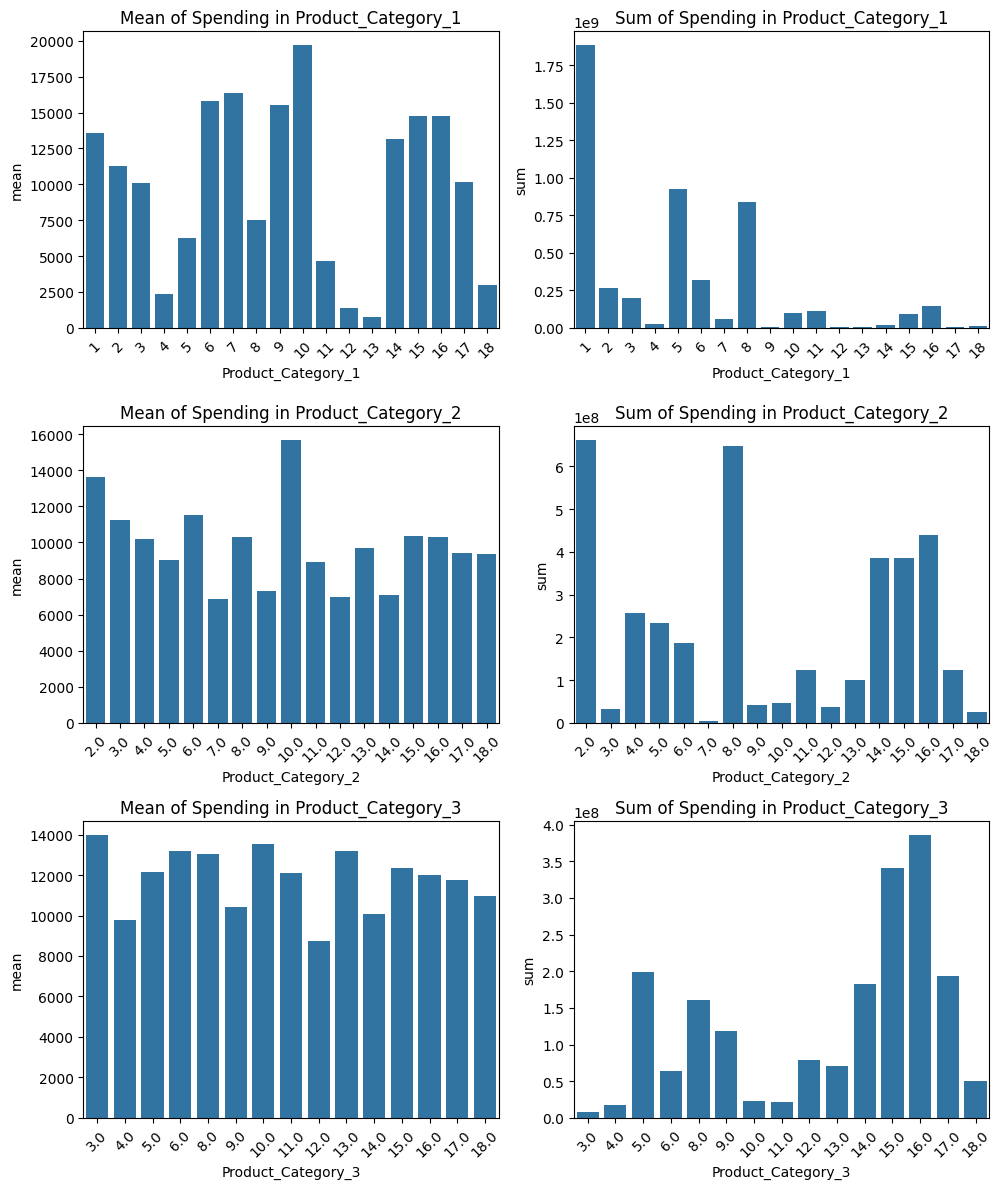

In [16]:
# Dictionary to hold the grouped data for easy iteration
category_groups = {
    'Product_Category_1': spending_category_1,
    'Product_Category_2': spending_category_2,
    'Product_Category_3': spending_category_3
}

# Aggregation functions to plot
aggregation_functions = ['mean', 'sum']

# Set up the figure size for multiple plots
plt.figure(figsize=(15, 12))

# Loop through each product category and each aggregation function
for i, (category, data) in enumerate(category_groups.items()):
    for j, agg_func in enumerate(aggregation_functions):
        plt.subplot(3, 3, i*3 + j + 1)  # Create a grid of 3x3 subplots
        sns.barplot(x=category, y=agg_func, data=data)
        plt.title(f'{agg_func.capitalize()} of Spending in {category}')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

4. **Do customers tend to buy products from multiple categories, or stick to one category?**  
If customers often buy from multiple categories, cross-category recommendations may be useful.  
Otherwise, sticking to similar product categories will be more effective.

In [17]:
dataset['num_categories_purchased'] = dataset[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].notnull().sum(axis=1)
# Create a new column that counts the number of categories purchased (now excluding 0)
#dataset['num_categories_purchased'] = dataset[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].gt(0).sum(axis=1)
# This column counts how many product categories (out of Product_Category_1, Product_Category_2, and Product_Category_3) were non-null for each purchase.

In [18]:
# Group by 'User_ID' to see how many unique categories each customer has bought from
customer_category_behavior = dataset.groupby('User_ID')['num_categories_purchased'].agg(['mean', 'count']).reset_index()
# Group the data by customer (User_ID) and calculate the mean number of categories they purchase from (to see their typical behavior) and the count of purchases they’ve made.

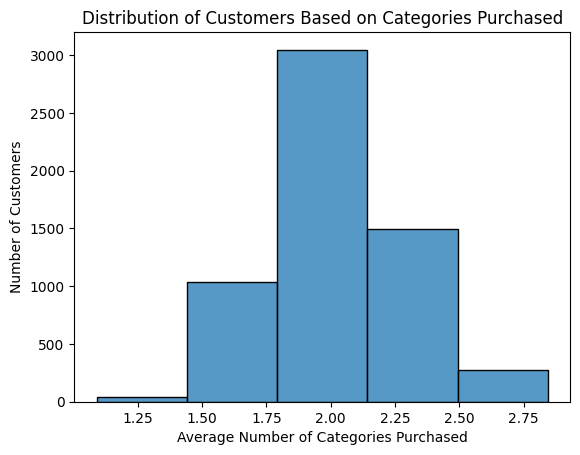

In [19]:
# Visualization to see distribution of customers by number of categories

sns.histplot(customer_category_behavior['mean'], bins=5)
plt.title('Distribution of Customers Based on Categories Purchased')
plt.xlabel('Average Number of Categories Purchased')
plt.ylabel('Number of Customers')
plt.show()

1. **Middle bin is the biggest:** This suggests that most customers tend to purchase from around 2 categories on average. This is the most common behavior, showing that many customers don’t limit themselves to just one category, but also don’t diversify too much.  

2. **Right-hand side bins (higher values):** These bins, representing customers who buy from more than 2 categories (closer to 3), indicate that there is a significant number of customers who do buy from all 3 categories, but they are fewer than the ones who stick to 2 categories.

3. **Left-hand side bins (lower values):** The left bins, showing smaller values (closer to 1), indicate that fewer customers stick to just one product category.

**Conclusion:**  
1. Most customers buy from multiple categories (typically 2 categories).
2. A smaller group of customers tends to buy from only one category, while some explore all three.
3. Therefore, you can conclude that customers generally don’t stick to just one category, but tend to buy from at least 2 categories on average.

5. **Is there any correlation between customer location (City_Category) and product preferences?**  
Different locations may have distinct preferences due to regional demand.  
Understanding location-based patterns will help you make location-specific product recommendations.

In [20]:
# Group by City_Category and calculate mean purchase for each product category
city_product_group = dataset.groupby('City_Category')[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].mean().reset_index()
print("The average product preferences in each city category.")
print(city_product_group)

The average product preferences in each city category.
  City_Category  Product_Category_1  Product_Category_2  Product_Category_3
0             A            5.437036            9.945026           12.682530
1             B            5.300420            9.825763           12.674811
2             C            5.165964            9.779649           12.654322


1. City_Category_A has an average value of 5.43 for Product_Category_1. This means that, on average, customers from City_Category_A tend to purchase products from subcategory 5 of Product_Category_1, but because the mean is slightly above 5, it suggests there may also be some purchases from subcategory 6.

2. Similarly, for Product_Category_2, the mean of 6.65 indicates that customers in this category are more likely to purchase from subcategory 6, and potentially some purchases from subcategory 7 (since the mean is between 6 and 7).

3. For Product_Category_3, with a mean of 3.58, customers in City_Category_A tend toward subcategory 3, with some overlap with subcategory 4.

**Caution:**  
Averages don’t always mean a clear preference for one subcategory. It simply shows a trend, but in cases where the mean is not a whole number (like 5.43), it might imply purchases from multiple nearby subcategories.

## Feature Engineering

In [21]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,num_categories_purchased
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200,3
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057,2
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969,1


1. **Which product categories are most frequently purchased?**  
**Insight**: This tells us which product categories are popular and could influence future recommendations.

In [22]:
dataset['Purchased_From_Product_Category_1'] = dataset['Product_Category_1'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)
dataset['Purchased_From_Product_Category_2'] = dataset['Product_Category_2'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)
dataset['Purchased_From_Product_Category_3'] = dataset['Product_Category_3'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)

2. **What are the purchase patterns across different gender?**  
**Insight**: Understanding how age and gender impact buying behavior allows us to personalize the recommendations.  

Here we use 'Age' and 'Gender' columns directly, as they are already categorical variables.

3. **How does spending vary across product categories?**  
**Insight**: High-spending customers may have different preferences than lower-spending ones.  
Segmenting by spending helps identify valuable customers and their product preferences.

In [23]:
customer_spending = dataset.groupby('User_ID')['Purchase'].agg(['sum', 'mean']).reset_index() #Grouping based on User_ID, calculate SUM and MEAN of each customer in total.
customer_spending.columns = ['User_ID', 'Total_Spend', 'Avg_Spend'] # Changing the name of the columns,From User_ID to User_ID, sum to Total_Spend and mean to Avg_Spend.
dataset = dataset.merge(customer_spending, on='User_ID', how='left') # Merging the new dataframe to the dataset.

In [24]:
# Average spending in Product Category 1
category_1_spending = dataset.groupby('User_ID')[['Product_Category_1', 'Purchase']].apply(lambda x: x.groupby('Product_Category_1').mean()).reset_index()
category_1_spending.columns = ['User_ID', 'Product_Category_1', 'Avg_Spend_Category_1']

# Average spending in Product Category 2
category_2_spending = dataset.groupby('User_ID')[['Product_Category_2', 'Purchase']].apply(lambda x: x.groupby('Product_Category_2').mean()).reset_index()
category_2_spending.columns = ['User_ID', 'Product_Category_2', 'Avg_Spend_Category_2']

# # Average spending in Product Category 3
category_3_spending = dataset.groupby('User_ID')[['Product_Category_3', 'Purchase']].apply(lambda x: x.groupby('Product_Category_3').mean()).reset_index()
category_3_spending.columns = ['User_ID', 'Product_Category_3', 'Avg_Spend_Category_3']

# Merging these back into the main dataset
dataset = dataset.merge(category_1_spending, on=['User_ID', 'Product_Category_1'], how='left')
dataset = dataset.merge(category_2_spending, on=['User_ID', 'Product_Category_2'], how='left')
dataset = dataset.merge(category_3_spending, on=['User_ID', 'Product_Category_3'], how='left')

4. **Do customers tend to buy products from multiple categories, or stick to one category?**   
**Insight**: Customers who buy across multiple categories may need different recommendations than those who stick to a single category.

Already covered and there is a feature called 'num_categories_purchased'.

5. **Interaction Features**  
It works by combining two different features, Gender and Purchased_From_Product_Category_1,2,3 , to capture how they interact with each other.  

**Gender_Product_1 = 0**: A female customer purchased from Product Category 1.  
**Gender_Product_1 = 1**: Either the customer is male, or they didn't purchase from Product Category 1.

In [25]:
dataset['Gender_Product_1'] = dataset['Gender'] * dataset['Purchased_From_Product_Category_1']
dataset['Gender_Product_2'] = dataset['Gender'] * dataset['Purchased_From_Product_Category_2']
dataset['Gender_Product_3'] = dataset['Gender'] * dataset['Purchased_From_Product_Category_3']

In [26]:
dataset.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'num_categories_purchased', 'Purchased_From_Product_Category_1',
       'Purchased_From_Product_Category_2',
       'Purchased_From_Product_Category_3', 'Total_Spend', 'Avg_Spend',
       'Avg_Spend_Category_1', 'Avg_Spend_Category_2', 'Avg_Spend_Category_3',
       'Gender_Product_1', 'Gender_Product_2', 'Gender_Product_3'],
      dtype='object')

## Model Building
1.1 Data Preprocessing

In [27]:
dataset.isnull().sum()

User_ID                                   0
Product_ID                                0
Gender                                    0
Age                                       0
Occupation                                0
City_Category                             0
Stay_In_Current_City_Years                0
Marital_Status                            0
Product_Category_1                        0
Product_Category_2                   166986
Product_Category_3                   373299
Purchase                                  0
num_categories_purchased                  0
Purchased_From_Product_Category_1         0
Purchased_From_Product_Category_2         0
Purchased_From_Product_Category_3         0
Total_Spend                               0
Avg_Spend                                 0
Avg_Spend_Category_1                      0
Avg_Spend_Category_2                 166986
Avg_Spend_Category_3                 373299
Gender_Product_1                          0
Gender_Product_2                

In [28]:
dataset['Product_Category_2'] = dataset['Product_Category_2'].fillna(0)
dataset['Product_Category_3'] = dataset['Product_Category_3'].fillna(0)
dataset['Avg_Spend_Category_2'] = dataset['Avg_Spend_Category_2'].fillna(0)
dataset['Avg_Spend_Category_3'] = dataset['Avg_Spend_Category_3'].fillna(0)

### Encoding Categorical Variables

In [29]:
# 3. One-Hot Encoding for Occupation
#dataset = pd.get_dummies(dataset, columns=['Occupation'])
# 2. Map Age to numerical values
#age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
#dataset['Age'] = dataset['Age'].map(age_mapping)
# One-Hot Encoding for Age (the order doesn't matter)
dataset = pd.get_dummies(dataset, columns=['Age'])
# 4. Convert Stay_In_Current_City_Years to numeric
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

In [32]:
dataset = pd.get_dummies(dataset, columns=['City_Category'])

In [33]:
dataset.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'num_categories_purchased', 'Purchased_From_Product_Category_1',
       'Purchased_From_Product_Category_2',
       'Purchased_From_Product_Category_3', 'Total_Spend', 'Avg_Spend',
       'Avg_Spend_Category_1', 'Avg_Spend_Category_2', 'Avg_Spend_Category_3',
       'Gender_Product_1', 'Gender_Product_2', 'Gender_Product_3', 'Age_0-17',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_A', 'City_Category_B', 'City_Category_C'],
      dtype='object')

### Training the model